In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt
from mtcnn import MTCNN
from matplotlib.patches import Rectangle

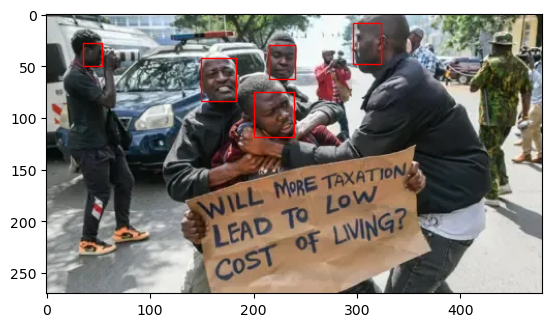

In [89]:
filenm='ww.webp'
image=plt.imread(filenm)
detector=MTCNN() #initialize mtcnn detector
faces = detector.detect_faces(image) #detect faces in the image

def draw_image_boxes(filenm, result_list):
    data=plt.imread(filenm)
    plt.imshow(data)
    ax=plt.gca()
    for result in result_list:
        x,y,width,height=result['box']
        rect=Rectangle((x,y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.show()

draw_image_boxes(filenm, faces)

In [80]:
df = DeepFace.find(img_path=filenm, db_path='face_photo', model_name='VGG-Face')
print(df)

24-12-03 13:00:41 - Searching t2.jpg in 44 length datastore
24-12-03 13:00:42 - find function duration 1.7772996425628662 seconds
[            identity                                      hash  target_x  \
0  face_photo\t2.jpg  0c6da50502cdafc72155cedad0ea46acc4534130        70   
1  face_photo\t3.jpg  8bb1b2b9c721fac0fb20204c7d84f4807d66ffe8        47   

   target_y  target_w  target_h  source_x  source_y  source_w  source_h  \
0        42       112       112        70        42       112       112   
1        54       111       111        70        42       112       112   

   threshold      distance  
0       0.68 -2.220446e-16  
1       0.68  4.464682e-01  ]


In [82]:
result = DeepFace.verify("t2.jpg", "t3.jpg")
print(result)

{'verified': True, 'distance': 0.4464681899091414, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 70, 'y': 42, 'w': 112, 'h': 112, 'left_eye': (146, 86), 'right_eye': (99, 85)}, 'img2': {'x': 47, 'y': 54, 'w': 111, 'h': 111, 'left_eye': (123, 97), 'right_eye': (80, 99)}}, 'time': 3.05}
